# P5 Segmentez des clients d'un site e-commerce

![alt text](DataBase_SQL.png "Title")



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation

In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}


# Importation rfm_reviews

In [3]:
rfm_reviews = pd.read_pickle('rfm_reviews.pkl')
rfm_reviews.head()

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.0,4.955123,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.0,3.302849,4.0
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.0,4.456902,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.0,3.775516,4.0
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.0,5.282645,5.0


In [63]:
rfm_reviews.review_score = round(rfm_reviews.review_score,0)

## K means

In [4]:
# conda install -c conda-forge yellowbrick

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [6]:
rfm_reviews.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
rq                    0
fq                    0
mq                    0
score                 0
log_r                 0
log_f                 0
log_m                 0
review_score          0
dtype: int64

In [65]:
X = np.array(rfm_reviews[['log_r','log_f','log_m','review_score']]) # On utilise la version log rfm

In [8]:
#X = np.array(rfm[['r','f','m']]) # normal

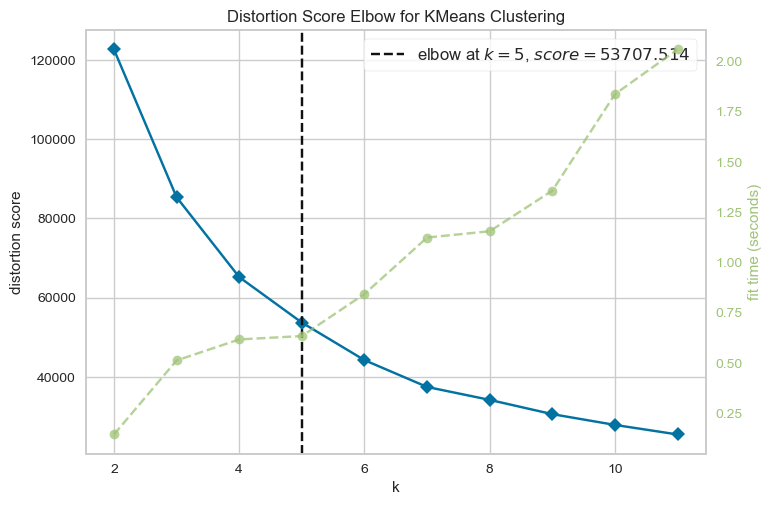

In [66]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

# Score Silhouette

In [10]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5560997439780972)
For n_clusters = 3, silhouette score is 0.39916214543004097)
For n_clusters = 4, silhouette score is 0.42234214487489324)
For n_clusters = 5, silhouette score is 0.4093606960844419)
For n_clusters = 6, silhouette score is 0.40498457449955994)
For n_clusters = 7, silhouette score is 0.4253002122917646)


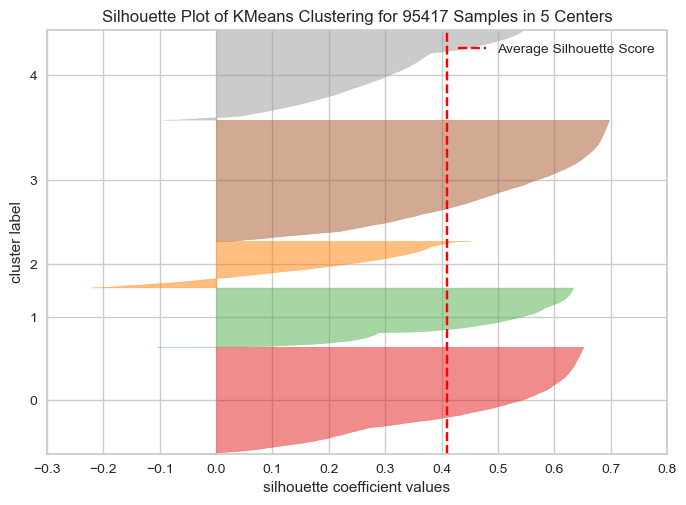

In [11]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

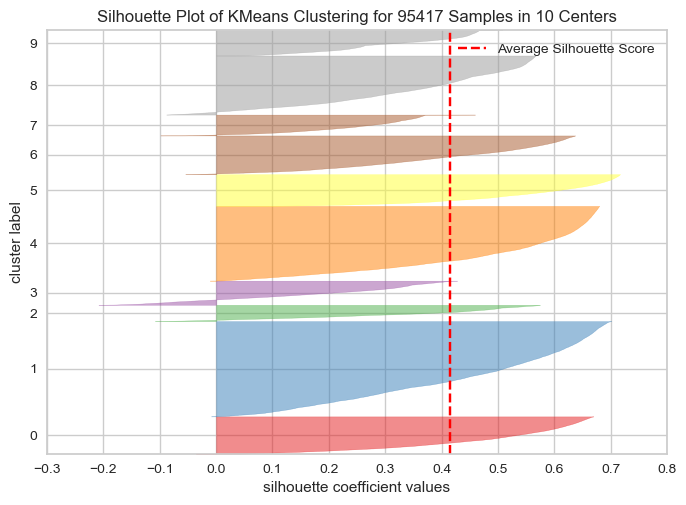

In [12]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

In [ ]:
# model = KMeans(n_clusters = 7, random_state=2023).fit(X)
# y_pred = model.predict(X)
# plt.scatter(X[:,0],X[:,1],c= y_pred)
# plt.show()

# ACP 

In [ ]:
# X = rfm[['r','f','m']]
# X = np.array(X)

In [14]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [15]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37117427 0.25242512]
0.6235993951442964


In [67]:
model = KMeans(n_clusters = 5, random_state=2023).fit(X)
y_pred = model.predict(X)
rfm_reviews['cluster'] = y_pred

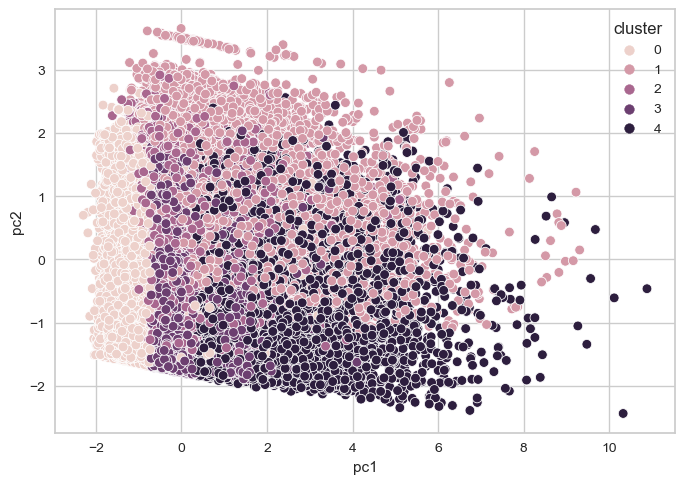

In [17]:
tmp = pd.DataFrame(pca.transform(X_scaled))
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

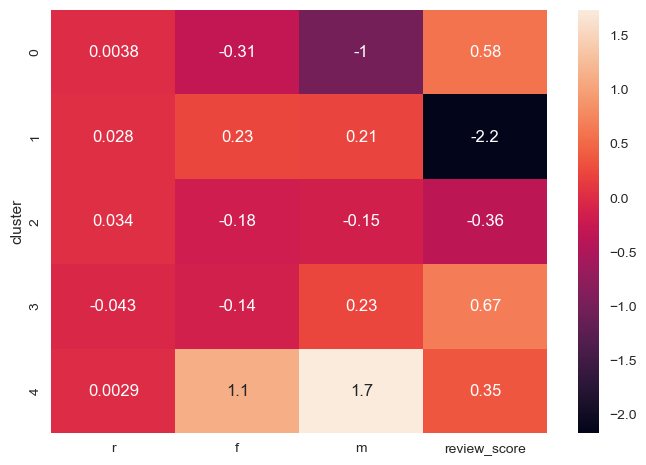

In [18]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred
tmp = tmp.groupby('cluster').mean()
sns.heatmap(tmp,annot=True)
plt.show()

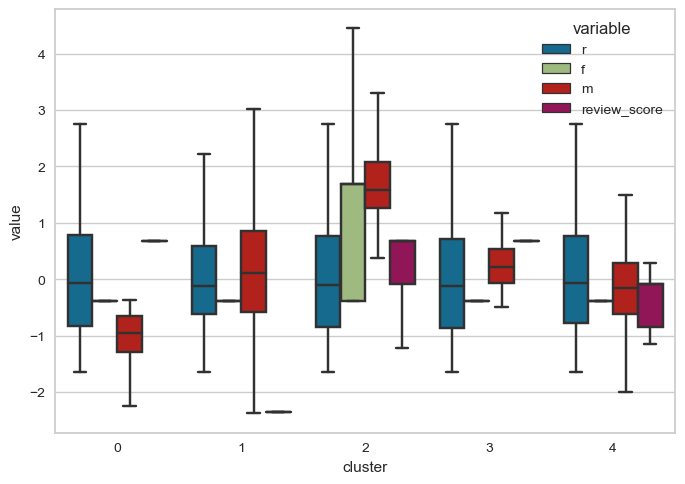

In [73]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred
tmp2 = pd.melt(frame = tmp, id_vars='cluster')

sns.boxplot(data=tmp2, x='cluster',y='value',hue='variable',showfliers=False)
plt.show()


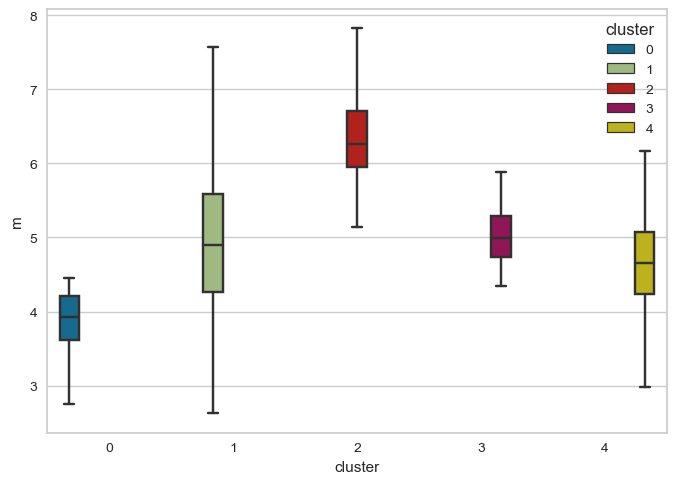

In [69]:
tmp = pd.DataFrame(X)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred


sns.boxplot(data=tmp,
            x='cluster',
            y='m',
            hue='cluster',
            showfliers=False)
plt.show()


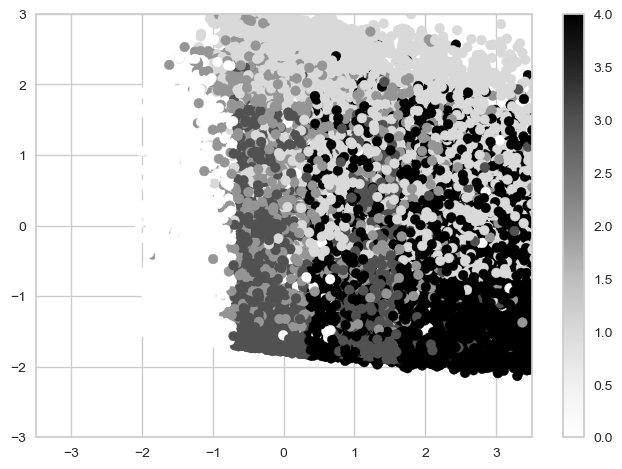

In [21]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y_pred)

plt.xlim([-3.5, 3.5])
plt.ylim([-3, 3])
plt.colorbar()
plt.show()

# TSNE 

In [22]:
from sklearn.manifold import TSNE

In [23]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=3).fit_transform(X_scaled)

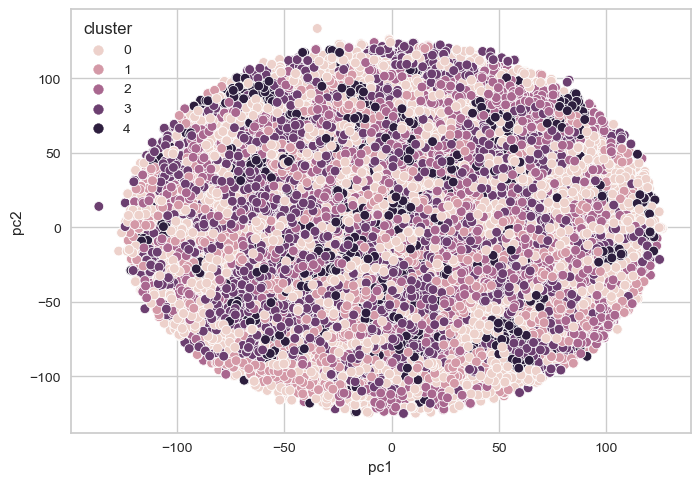

In [24]:
tmp = pd.DataFrame(X_embedded)
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

In [25]:
rfm_reviews

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.000000,4.955123,5.0,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.000000,3.302849,4.0,0
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.000000,4.456902,3.0,2
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.000000,3.775516,4.0,0
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.000000,5.282645,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012,7.687539,0.693147,8.327204,5.0,4
95413,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101,7.598900,0.000000,4.437698,4.0,2
95414,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001,7.741534,0.000000,4.722598,5.0,3
95415,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201,7.524561,0.000000,4.895524,5.0,3


# DBSCAN 

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
X_scaled

array([[-0.83258552, -0.38766146,  0.16623193,  0.67305095],
       [-0.81140293, -0.38766146, -1.6371747 , -0.08220213],
       [ 1.87591755, -0.38766146, -0.37756066, -0.8374552 ],
       ...,
       [ 2.05268581, -0.38766146, -0.08756209,  0.67305095],
       [-0.7761749 , -0.38766146,  0.10118153,  0.67305095],
       [ 1.56803606, -0.38766146, -0.58097345,  0.67305095]])

In [28]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)

In [29]:
rfm_reviews['cluster_dbscan'] = clustering.labels_

clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

### On a autant de cluster avec Dbscan que de segmentation RFM

In [40]:
pd.crosstab(rfm_reviews['cluster_dbscan'],rfm_reviews['score'])

score,000,001,002,010,011,012,020,021,022,100,...,122,200,201,202,210,211,212,220,221,222
cluster_dbscan,,,,,,,,,,,,,,,,,,,,,
-1,2,1,15,9,1,19,46,44,205,0,...,104,0,0,1,1,0,9,21,18,120
0,10379,9754,7249,0,0,0,0,0,0,10190,...,0,9795,9789,7390,0,0,0,0,0,0
1,0,0,0,346,875,2413,0,0,0,0,...,0,0,0,0,259,722,2481,0,0,0
2,0,0,0,0,0,0,11,21,251,0,...,240,0,0,0,0,0,0,7,16,237
3,0,0,0,0,0,0,29,55,415,0,...,416,0,0,0,0,0,0,31,31,487
4,0,0,0,0,0,0,0,0,2,0,...,22,0,0,0,0,0,0,0,0,16
5,0,0,0,0,0,0,0,1,79,0,...,150,0,0,0,0,0,0,0,3,80
6,0,0,0,0,0,0,0,0,33,0,...,32,0,0,0,0,0,0,0,0,64
7,0,0,0,0,0,0,0,0,30,0,...,44,0,0,0,0,0,0,0,0,61


# CAH
    Méthode chronophage 
    Peu recommandé pour un dataset volumineux comme le nôtre
    D'autant plus que dans le scénario Opencassrooms nous ne disposons que -pour l'instant- de 3 % du jeu de données

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
X_scaled[0:20000].shape

(20000, 4)

In [33]:
%%time    
y_pred = AgglomerativeClustering(n_clusters = 5).fit_predict(X_scaled[0:35000])

Wall time: 39.3 s


In [34]:
y_pred.shape

(35000,)

In [35]:
# # Visualisation du résultat
# plt.figure(figsize = (5,5))
# plt.scatter(X['abscisse'],X['ordonnée'],c = y_pred);

# Interprétation des classes et clusters

In [ ]:
# NP where faire les segments
# compare avec crosstab et cluster 
# heatmap

In [83]:
# Nouvelle colonne pour segment
rfm_reviews['segment'] = rfm_reviews['score']

![alt text](Capture_ecran_RFM_segment.png "Title")

## Définissons nos segments en s'inspirant de la documentation ci-dessus

In [84]:
champions = ['222']
loyal_customers = ['212','112','121','221','122','211']
Potentiel_loyalist = ['220','210']
new_customers = ['200','201',"202"]
promising = ['100','111','101','102','120']
at_risk = ['012','021','011']
can_not_lose_them = ['022']
hibernating = ['110','010','020']
lost_or_casual = ['000','001','002']

mon_dic = {'champions' : champions,
           'loyal_customers' : loyal_customers,
           'Potentiel_loyalist' : Potentiel_loyalist,
           'new_customers' : new_customers,
           'promising' : promising,
           'at_risk' : at_risk,
           'can_not_lose_them' : can_not_lose_them,
           'lost_or_casual' : lost_or_casual,
           'hibernating' : hibernating
          }

### On applique à notre nouvelle colonne segment

In [85]:
for x,y in mon_dic.items():
        rfm_reviews['segment'] = np.where(
        rfm_reviews['segment'].isin(y),
        x,
        rfm_reviews['segment']
        )




In [81]:
rfm_reviews

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score,cluster,cluster_dbscan,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.000000,4.955123,5.0,3,0,new_customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.000000,3.302849,4.0,0,0,new_customers
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.000000,4.456902,3.0,4,0,lost_or_casual
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.000000,3.775516,4.0,0,0,lost_or_casual
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.000000,5.282645,5.0,3,0,lost_or_casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012,7.687539,0.693147,8.327204,5.0,2,1,at_risk
95413,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101,7.598900,0.000000,4.437698,4.0,4,0,promising
95414,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001,7.741534,0.000000,4.722598,5.0,3,0,lost_or_casual
95415,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201,7.524561,0.000000,4.895524,5.0,3,0,new_customers


<AxesSubplot:>

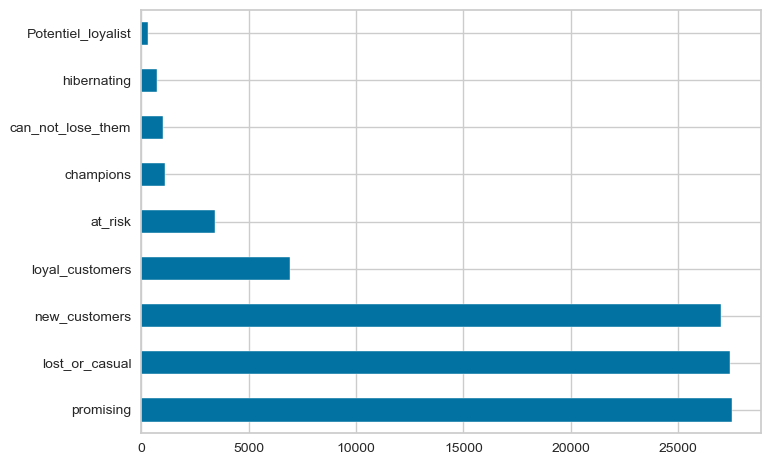

In [86]:
rfm_reviews.segment.value_counts().plot(kind='barh')

In [87]:
_ = pd.crosstab(rfm_reviews['segment'],rfm_reviews['cluster'])
_

cluster,0,1,2,3,4
segment,,,,,
Potentiel_loyalist,212,29,0,0,81
at_risk,39,601,1194,1055,569
can_not_lose_them,0,246,723,37,31
champions,0,233,795,51,20
hibernating,458,95,0,0,172
lost_or_casual,8232,3115,1764,7939,6350
loyal_customers,26,1740,2792,1524,835
new_customers,7950,2646,1686,8882,5811
promising,7468,4668,1396,7546,6406


[]

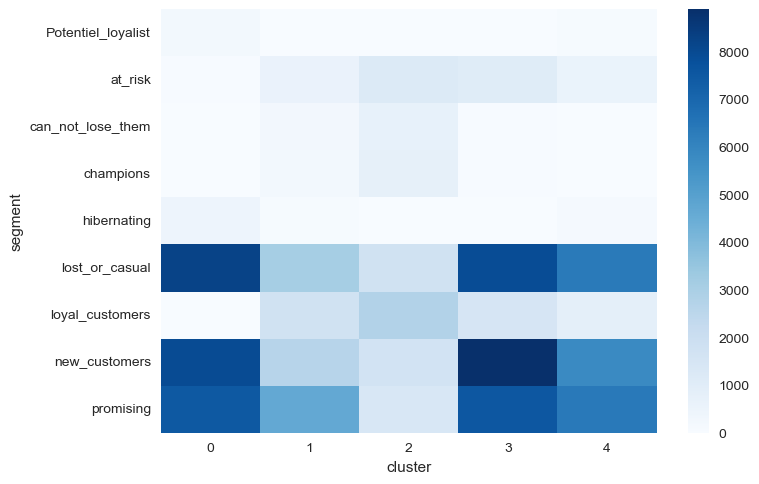

In [88]:
sns.heatmap(_, annot=False, cmap="Blues")
plt.plot()

### Limite : beaucoup de client dans notre échantillon n'achète qu'un seul bien

## Reviews

In [89]:
rfm_reviews.columns

Index(['customer_unique_id', 'r', 'f', 'm', 'rq', 'fq', 'mq', 'score', 'log_r',
       'log_f', 'log_m', 'review_score', 'cluster', 'cluster_dbscan',
       'segment'],
      dtype='object')

In [90]:
_ = pd.crosstab(rfm_reviews['review_score'],rfm_reviews['cluster'])
_

cluster,0,1,2,3,4
review_score,,,,,
1.0,0,10301,9,0,0
2.0,0,3072,39,0,0
3.0,0,0,733,0,7144
4.0,2634,0,3008,0,13131
5.0,21751,0,6561,27034,0


[]

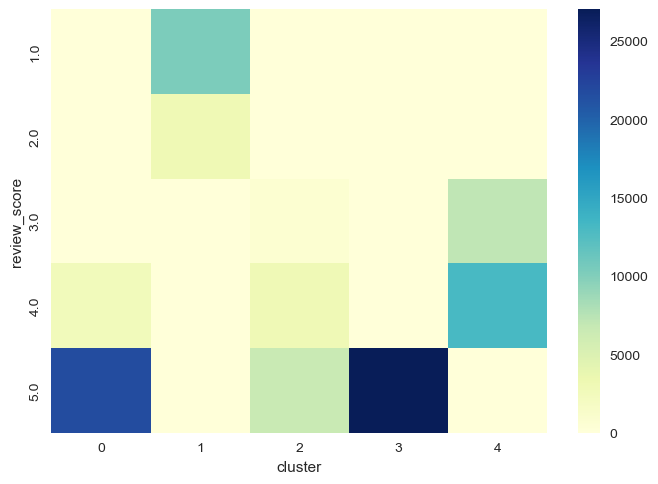

In [91]:
sns.heatmap(_, annot=False, cmap="YlGnBu")
plt.plot()